In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-01-01'
end = '2024-02-28'
stock = 'RS'

data = yf.download(stock, start, end)
info = yf.Ticker(stock).info
news = yf.Ticker(stock).news

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,75.839996,76.029999,74.580002,75.250000,60.479534,284100
1,2014-01-03,75.250000,75.599998,74.830002,75.489998,60.672451,196600
2,2014-01-06,75.639999,75.900002,74.080002,74.620003,59.973206,338400
3,2014-01-07,74.919998,75.629997,74.790001,75.029999,60.302719,306900
4,2014-01-08,75.029999,75.779999,74.720001,75.550003,60.720646,271300
...,...,...,...,...,...,...,...
2550,2024-02-21,318.019989,319.029999,313.420013,316.269989,315.190491,310000
2551,2024-02-22,316.269989,320.200012,316.269989,319.299988,318.210144,215100
2552,2024-02-23,320.700012,325.119995,319.190002,324.119995,323.013702,226200
2553,2024-02-26,322.890015,327.809998,322.429993,325.589996,324.478668,177800


In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,75.839996,76.029999,74.580002,75.250000,60.479534,284100
1,2014-01-03,75.250000,75.599998,74.830002,75.489998,60.672451,196600
2,2014-01-06,75.639999,75.900002,74.080002,74.620003,59.973206,338400
3,2014-01-07,74.919998,75.629997,74.790001,75.029999,60.302719,306900
4,2014-01-08,75.029999,75.779999,74.720001,75.550003,60.720646,271300
...,...,...,...,...,...,...,...
2550,2024-02-21,318.019989,319.029999,313.420013,316.269989,315.190491,310000
2551,2024-02-22,316.269989,320.200012,316.269989,319.299988,318.210144,215100
2552,2024-02-23,320.700012,325.119995,319.190002,324.119995,323.013702,226200
2553,2024-02-26,322.890015,327.809998,322.429993,325.589996,324.478668,177800


In [6]:
ma_100_days = data.Close.rolling(100).mean()

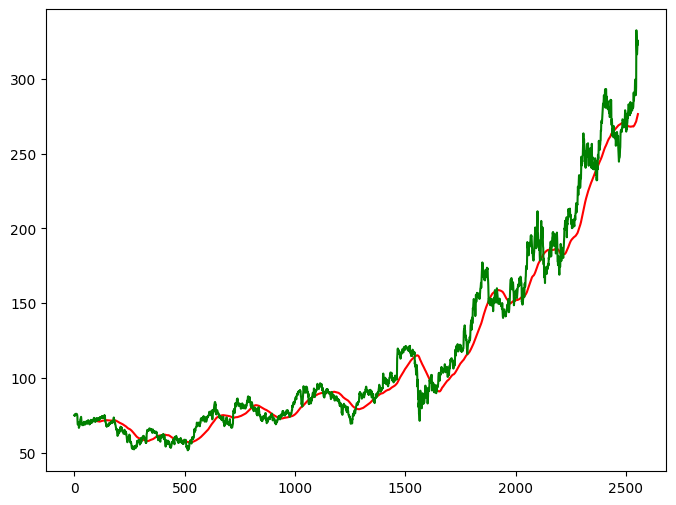

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()

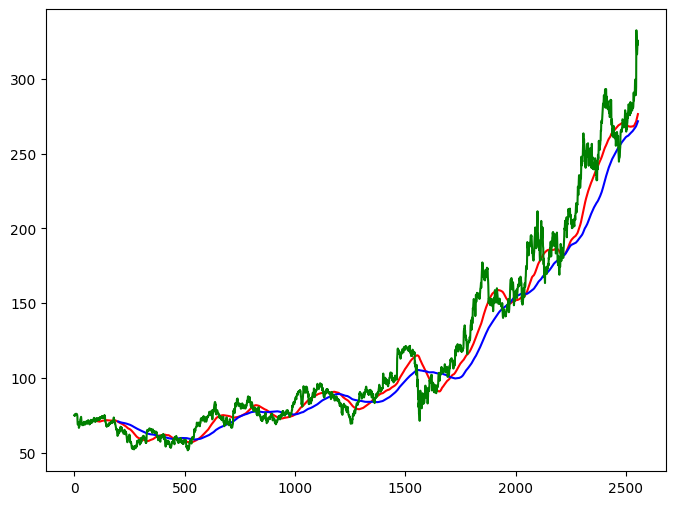

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0]

2044

In [13]:
data_test.shape[0]

511

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [17]:
x, y = np.array(x), np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\adity\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 24s 218ms/step - loss: 0.0550
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 222ms/step - loss: 0.0068
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - loss: 0.0056
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - loss: 0.0056
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - loss: 0.0051
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - loss: 0.0046
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - loss: 0.0041
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - loss: 0.0048
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - loss: 0.0050
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - loss: 0.0044
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - loss: 0.0051
Epoch 12/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - loss: 0.0042
Epoch 13/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 218ms/step - loss: 0.0051
Epoch 14/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - loss: 0.0038
Epoch 15/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [25]:
data_test_scale  =  scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [27]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step


In [28]:
scale =1/scaler.scale_

In [29]:
y_predict = y_predict*scale

In [30]:
y = y*scale

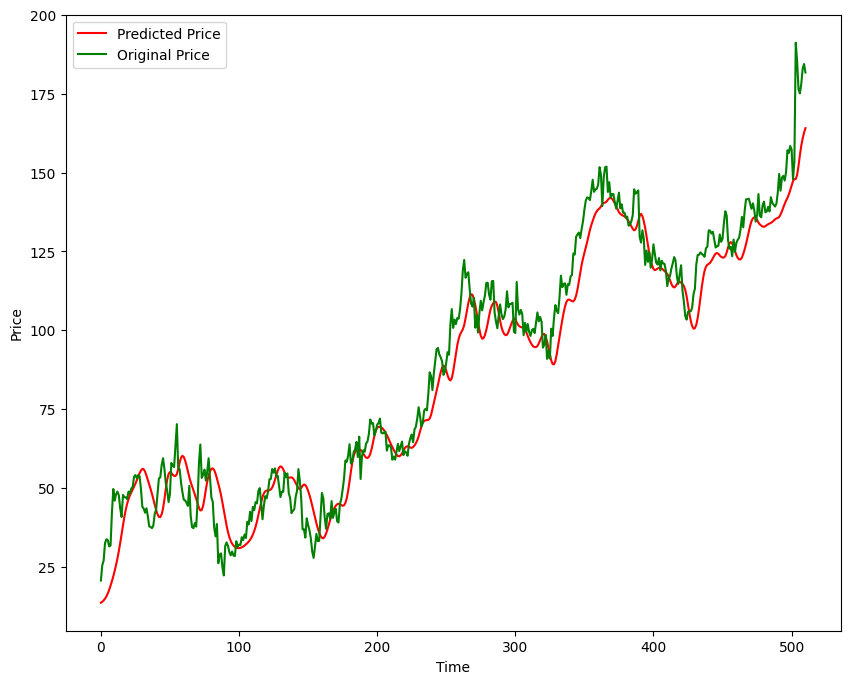

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Predictions Model.keras')

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
# Inverse scale the predicted and true values
y_predict = scaler.inverse_transform(y_predict)
y_true = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_predict)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_predict)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 1384.5200856419779
Mean Squared Error (MSE): 3152058.586698836
Root Mean Squared Error (RMSE): 1775.4037813125317
